# Task 1

---

## Web scraping and analysis

This Jupyter notebook includes some code to get you started with web scraping. We will use a package called `BeautifulSoup` to collect the data from the web. Once you've collected your data and saved it into a local `.csv` file you should start with your analysis.

### Scraping data from Skytrax

If you visit [https://www.airlinequality.com] you can see that there is a lot of data there. For this task, we are only interested in reviews related to British Airways and the Airline itself.

If you navigate to this link: [https://www.airlinequality.com/airline-reviews/british-airways] you will see this data. Now, we can use `Python` and `BeautifulSoup` to collect all the links to the reviews and then to collect the text data on each of the individual review links.

In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

In [28]:
base_url = "https://www.airlinequality.com/airline-reviews/british-airways"
pages = 10
page_size = 100

reviews = []

# for i in range(1, pages + 1):
for i in range(1, pages + 1):

    print(f"Scraping page {i}")

    # Create URL to collect links from paginated data
    url = f"{base_url}/page/{i}/?sortby=post_date%3ADesc&pagesize={page_size}"

    # Collect HTML data from this page
    response = requests.get(url)

    # Parse content
    content = response.content
    parsed_content = BeautifulSoup(content, 'html.parser')
    for para in parsed_content.find_all("div", {"class": "text_content"}):
        reviews.append(para.get_text())
    
    print(f"   ---> {len(reviews)} total reviews")

Scraping page 1
   ---> 100 total reviews
Scraping page 2
   ---> 200 total reviews
Scraping page 3
   ---> 300 total reviews
Scraping page 4
   ---> 400 total reviews
Scraping page 5
   ---> 500 total reviews
Scraping page 6
   ---> 600 total reviews
Scraping page 7
   ---> 700 total reviews
Scraping page 8
   ---> 800 total reviews
Scraping page 9
   ---> 900 total reviews
Scraping page 10
   ---> 1000 total reviews


In [37]:
df = pd.DataFrame()
df["reviews"] = reviews
df.head()

,reviews
0,✅ Trip Verified | Good domestic flight operat...
1,Not Verified | Failed at all basic travel fund...
2,✅ Trip Verified | They lost my baggage in a v...
3,✅ Trip Verified | Late boarding led to a one ...
4,✅ Trip Verified | As usual the flight is delay...


In [38]:
df.to_csv("/Users/protimatarafdar/Downloads/BA_reviews.csv")

Congratulations! Now you have your dataset for this task! The loops above collected 1000 reviews by iterating through the paginated pages on the website. However, if you want to collect more data, try increasing the number of pages!

 The next thing that you should do is clean this data to remove any unnecessary text from each of the rows. For example, "✅ Trip Verified" can be removed from each row if it exists, as it's not relevant to what we want to investigate.

In [39]:
df.reviews= df.reviews.str.split('|',expand=True)[1]

In [50]:
df

,reviews
0,Good domestic flight operated by BA Cityflye...
1,Failed at all basic travel fundamentals: 1) O...
2,They lost my baggage in a very simple situat...
3,Late boarding led to a one hour flight leavi...
4,As usual the flight is delayed. BA try to bla...
...,...
995,Miami to London Heathrow. As with many other...
996,London Heathrow to Milan Malpensa. Worst airl...
997,Calgary to Rome via London. My wife and I bo...
998,London to Bangkok. Flew British Airways for ...


#Text Preprocessing

--

##Removed punctuations, emojis, lower case, and then tokenized.

In [146]:
import string
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import nltk

# Download NLTK resources
nltk.download('stopwords')
nltk.download('punkt')


# Function to clean a single review
def clean_review(review):
    # Convert to lowercase
    review = review.lower()
    
    # Remove punctuation
    review = review.translate(str.maketrans('', '', string.punctuation))

    #Remove Special Characters
    review = re.sub(r'[^a-zA-Z0-9\s]', '', review)

    #Remove numbers
    review = ''.join([c for c in review if not c.isdigit()])
   
    # Tokenize the review
    words = word_tokenize(review)
    
    # Remove stopwords
    additional_stopwords = ['british', 'airways', 'ba', "flight", 'london']
    stop_words = set(stopwords.words('english'))
    custom_stopwords = stop_words.union(additional_stopwords)
    words = [word for word in words if word not in custom_stopwords]

    # Join the cleaned words back to a sentence
    cleaned_review = ' '.join(words)
    
    return cleaned_review


[nltk_data] Error loading stopwords: <urlopen error [Errno 8] nodename
[nltk_data]     nor servname provided, or not known>
[nltk_data] Error loading punkt: <urlopen error [Errno 8] nodename nor
[nltk_data]     servname provided, or not known>


In [147]:
df['cleaned_reviews'] = df['reviews'].apply(clean_review)


OSError: [Errno 24] Too many open files: '/Users/protimatarafdar/nltk_data/corpora/stopwords/english'

In [125]:
df.head()

,reviews,cleaned_reviews
0,good domestic flight operated by ba cityflye...,good domestic operated cityflyer ground servic...
1,failed at all basic travel fundamentals: 1) o...,failed basic travel fundamentals delayed staff...
2,they lost my baggage in a very simple situat...,lost baggage simple situation three weeks dont...
3,late boarding led to a one hour flight leavi...,late boarding led one hour leaving two hours l...
4,as usual the flight is delayed. ba try to bla...,usual delayed try blame someone inability inca...


##Data Analysis - Topic Modelling

In [92]:
import gensim
from gensim import corpora

In [126]:
reviews = df['cleaned_reviews'].tolist()

# Tokenize and remove stopwords
stop_words = set(stopwords.words('english'))
tokenized_reviews = [word_tokenize(review) for review in reviews]
tokenized_reviews = [[word for word in review if word not in stop_words] for review in tokenized_reviews]

# Create a dictionary and a corpus
dictionary = corpora.Dictionary(tokenized_reviews)
corpus = [dictionary.doc2bow(review) for review in tokenized_reviews]


In [127]:
# Number of topics
num_topics = 15

# Build LDA model
lda_model = gensim.models.LdaModel(corpus, num_topics=num_topics, id2word=dictionary, passes=15)

Topic 1: 0.014*"service"
Topic 2: 0.014*"good"
Topic 3: 0.012*"seat"
Topic 4: 0.012*"us"
Topic 5: 0.030*"seat"
Topic 6: 0.015*"seats"
Topic 7: 0.011*"seat"
Topic 8: 0.010*"service"
Topic 9: 0.010*"crew"
Topic 10: 0.015*"cabin"
Topic 11: 0.009*"food"
Topic 12: 0.010*"class"
Topic 13: 0.007*"booked"
Topic 14: 0.017*"crew"
Topic 15: 0.008*"time"


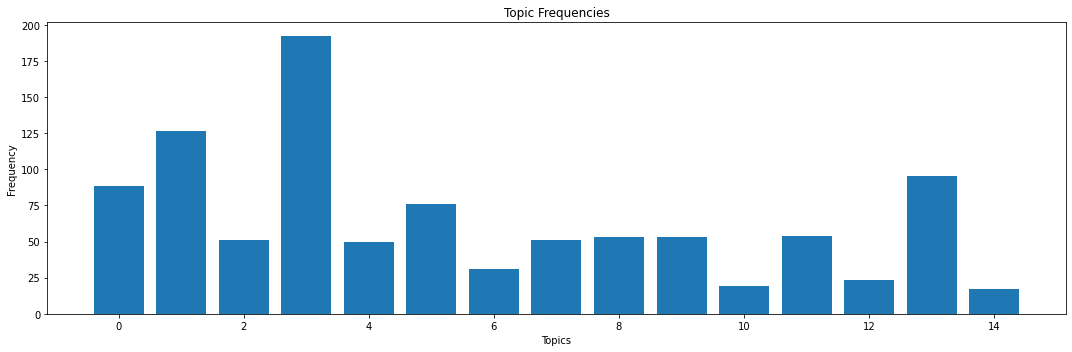

In [128]:
import matplotlib.pyplot as plt

# Print topics and their associated words
topics = lda_model.print_topics(num_words=1)
for i, topic in enumerate(topics):
    print(f"Topic {i + 1}: {topic[1]}")

# Extract topic frequencies from the corpus
topic_frequencies = [dict(topic_dist) for topic_dist in lda_model.get_document_topics(corpus)]

# Create a DataFrame for topic frequencies
topic_df = pd.DataFrame(topic_frequencies)
topic_df.fillna(0, inplace=True)


# Calculate the sum of topic frequencies
topic_sum = topic_df.sum().sort_values(ascending=False)

# Create a bar plot using matplotlib
plt.figure(figsize=(15, 5))
plt.bar(topic_sum.index, topic_sum.values)
plt.xlabel('Topics')
plt.ylabel('Frequency')
plt.title('Topic Frequencies')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

In [145]:
df.to_csv("/Users/protimatarafdar/Desktop/s.csv")

OSError: [Errno 24] Too many open files: '/Users/protimatarafdar/Desktop/s.csv'

In [138]:
from pytagcloud import create_tag_image, make_tags
import matplotlib.pyplot as plt

# Combine cleaned reviews into a single string
all_cleaned_reviews = ' '.join(df['cleaned_reviews'])

#Split cleaned reviews into individual words
all_cleaned_reviews_words = all_cleaned_reviews.split()

# Count the frequency of each word
word_counts = {word: all_cleaned_reviews_words.count(word) for word in all_cleaned_reviews_words}

# Create tags for word cloud
tags = make_tags(list(word_counts.items()), maxsize=80)

# Create a word cloud image
create_tag_image(tags, 'wordcloud.png', size=(800, 400), fontname='Lobster')

# Display the word cloud image using matplotlib
plt.figure(figsize=(10, 5))
plt.imshow(plt.imread('wordcloud.png'), interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud - Cleaned Reviews')
plt.show()

FileNotFoundError: No such file or directory: '/Users/protimatarafdar/opt/anaconda3/lib/python3.9/site-packages/pytagcloud/fonts/Lobster.ttf'.

In [135]:
!pip install simplejson



     |████████████████████████████████| 76 kB 4.6 MB/s eta 0:00:011


In [100]:
#!pip install wordcloud
!pip install matplotlib

In [76]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

nltk.download('wordnet')

# Create a single string containing all cleaned reviews
all_cleaned_reviews = ' '.join(df['cleaned_reviews'])

# Set a font path that is available on your system
font_path = "/path/to/your/font.ttf"  # Replace with the actual font file path

# Generate a word cloud with the specified font path
wordcloud = WordCloud(width=800, height=400, background_color='white', font_path=font_path).generate(all_cleaned_reviews)

# Display the word cloud using matplotlib
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/protimatarafdar/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


OSError: cannot open resource